Titanic challenge groep 3 Symbiosis4Growth


## Training a model for the titanic
1. Conduct Uni- and Bivariate analysis.
2. Clean the data (fix missing values, encode categorical values).
3. Use different ML methods to start training a model.
    - Logistic regression
    - Decesion tree
    - Random forest
4. Re-evaluate the model and change parameters.



Before looking at the data, we thought that **sex, age, and ticket class** would be important factors. This is because, historically, survival rates often vary by gender and age. For example, during the Titanic disaster, women and children were given priority when evacuating. So, we believed these factors would be key in predicting who survived.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train_df = pd.read_csv('train.csv', sep=',')
test_df = pd.read_csv('test.csv', sep=',')

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


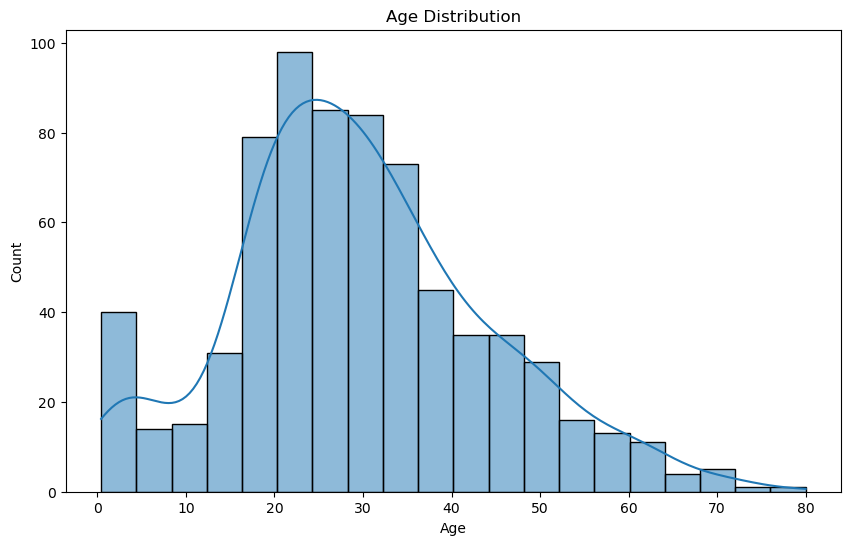

In [2]:
plt.figure(figsize=(10,6))
sns.histplot(train_df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

##### Statistics for PClass

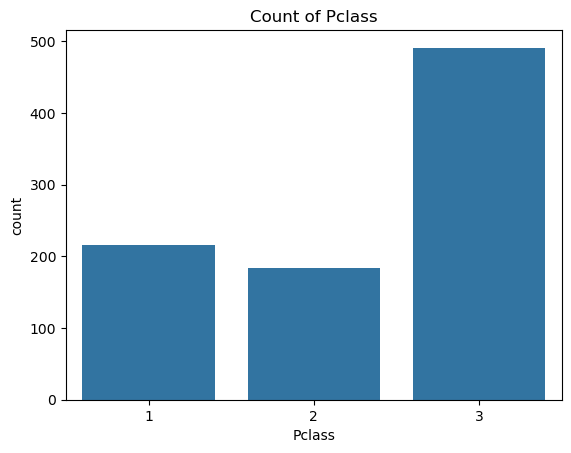

In [3]:
sns.countplot(x='Pclass', data=train_df)
plt.title('Count of Pclass')
plt.show()
    

##### Statistics for Fare

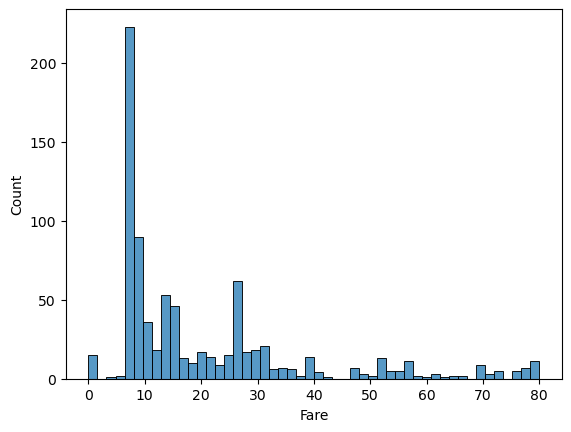

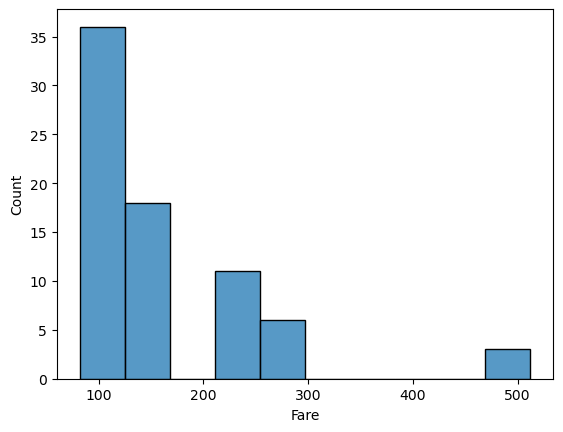

In [4]:
fare = train_df['Fare']
sns.histplot(bins=50, data=fare[fare <= 80])
plt.show()

fare = train_df['Fare']
sns.histplot(bins=10, data=fare[fare > 80])
plt.show()


##### Statistics for Gender

In [5]:
print(train_df['Sex'].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64


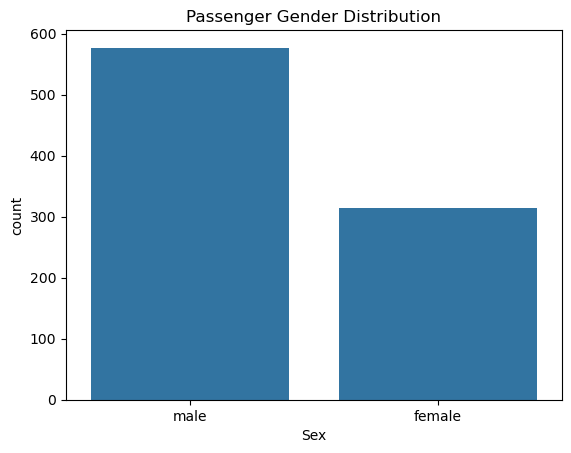

In [6]:
sns.countplot(x='Sex', data=train_df)
plt.title('Passenger Gender Distribution')
plt.show()

## Bivariate Analysis

##### Statistics Survival by Age & Sex & Pclass

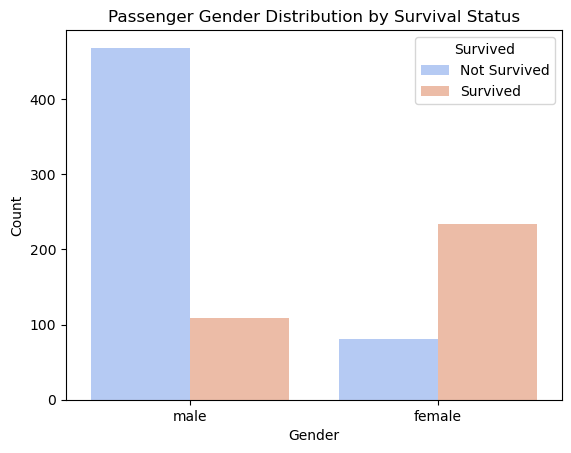

In [7]:
# Survival by Gender
sns.countplot(data=train_df, x='Sex', hue='Survived', palette='coolwarm', hue_order=[0, 1])
plt.title('Passenger Gender Distribution by Survival Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()

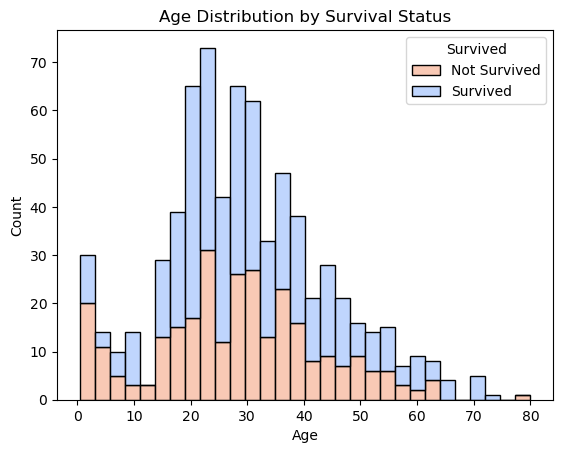

In [8]:
# Survival by Age
sns.histplot(data=train_df, x='Age', hue='Survived', palette='coolwarm', hue_order=[0, 1], multiple='stack', bins=30)
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()

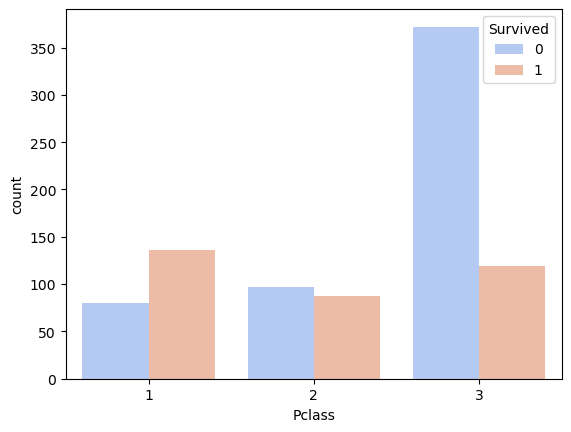

In [9]:
# Nr of Survived based on PClass
sns.countplot(data=train_df, x='Pclass', hue='Survived', palette='coolwarm', hue_order=[0, 1])
plt.show()

## Multivariate

In [10]:
# Correlation matrix
cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex']

# # Male = 0 
# # Female = 1 
# train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
# test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})

# filtered = train_df[cols]
# filtered.corr().style.background_gradient(cmap='coolwarm', axis=None).format(precision= 2)

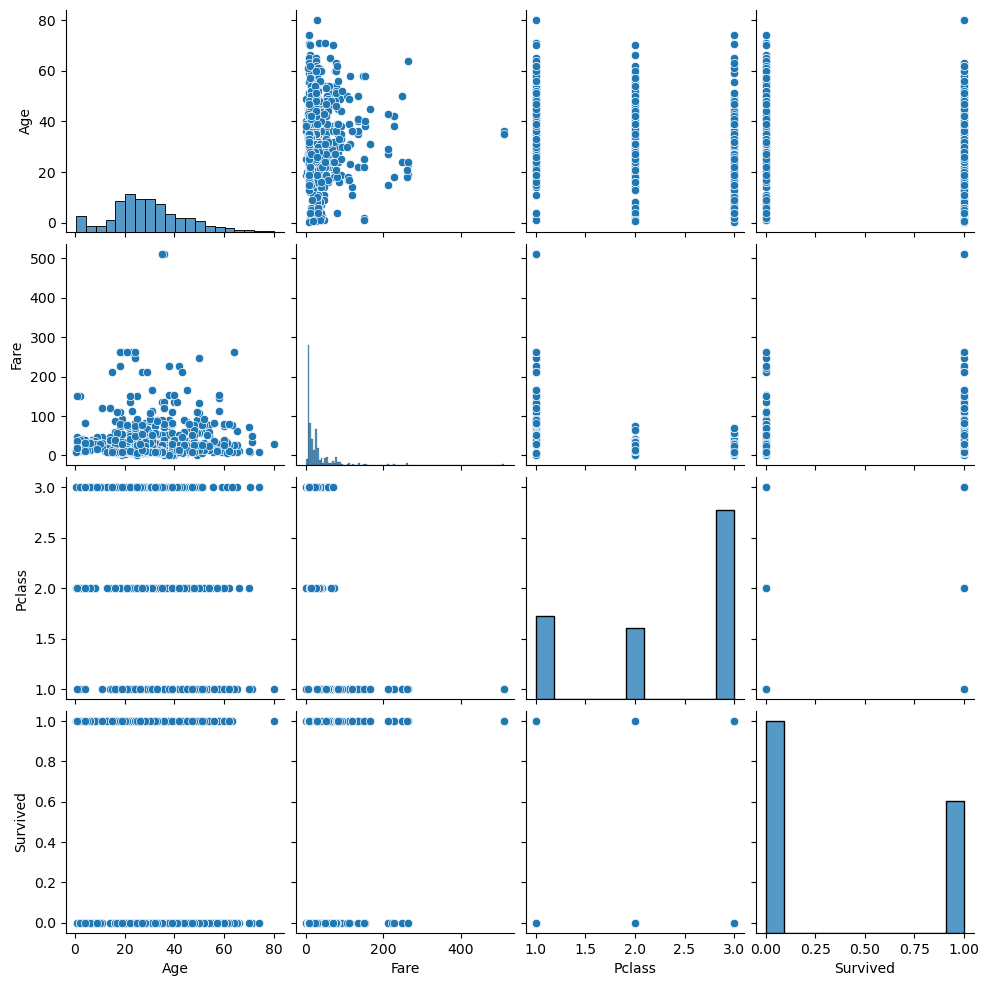

In [11]:
# Seaborn pairplot
sns.pairplot(train_df[['Age', 'Fare', 'Pclass', 'Survived']])
plt.show()

## Feature engineering

In [12]:
# Feature Engineering
# df2['FamilySize'] = df2['SibSp'] + df2['Parch'] + 1
# df2['IsAlone'] = (df2['FamilySize'] == 1).astype(int)
# df2['FarePerPerson'] = df2['Fare'] / df2['FamilySize']

## Model Training

### Logistic regression

AUC-ROC Score Training dataset: 0.77
AUC-ROC Score Test dataset: 0.79


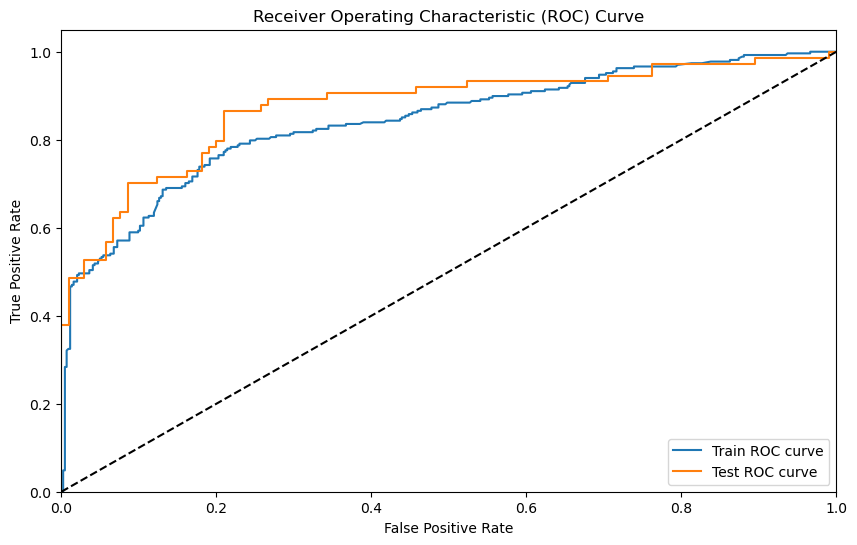

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler

def prepData(dataset) : 
    features = ['Sex', 'Age', 'Pclass', 'Fare', 'Survived']
    model_df = dataset[features]
    model_df = pd.get_dummies(model_df, columns=['Pclass'], drop_first=False)
    model_df.loc[:, 'Age'] = model_df['Age'].fillna(model_df['Age'].mean())
    model_df.loc[:, 'Fare'] = model_df['Fare'].fillna(model_df['Fare'].mean())
    model_df.loc[:, 'Sex'] = model_df['Sex'].map({'male': 0, 'female': 1})
    X = model_df[['Sex', 'Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3']]
    y = model_df['Survived']
    return X, y

def prepDataTest(dataset) : 
    features = ['Sex', 'Age', 'Pclass', 'Fare']
    model_df = dataset[features]
    model_df = pd.get_dummies(model_df, columns=['Pclass'], drop_first=False)
    model_df.loc[:, 'Age'] = model_df['Age'].fillna(model_df['Age'].mean())
    model_df.loc[:, 'Fare'] = model_df['Fare'].fillna(model_df['Fare'].mean())
    model_df.loc[:, 'Sex'] = model_df['Sex'].map({'male': 0, 'female': 1})
    X = model_df[['Sex', 'Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3']]
    return X

kaggleX = prepDataTest(test_df)

X, y = prepData(train_df)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model - Logistic regression
clf = LogisticRegression(max_iter=200).fit(X_train, y_train)

# Predict the validation & test set
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
kaggle_Y = clf.predict(kaggleX)

auc_train_score = roc_auc_score(y_train, y_train_pred)
auc_test_score = roc_auc_score(y_test, y_test_pred)
print(f"AUC-ROC Score Training dataset: {auc_train_score:.2f}")
print(f"AUC-ROC Score Test dataset: {auc_test_score:.2f}")

# Calculate the ROC curve
fpr_train, tpr_train, _ = roc_curve(y_train, clf.predict_proba(X_train)[:, 1])
fpr_test, tpr_test, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, label='Train ROC curve')
plt.plot(fpr_test, tpr_test, label='Test ROC curve')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

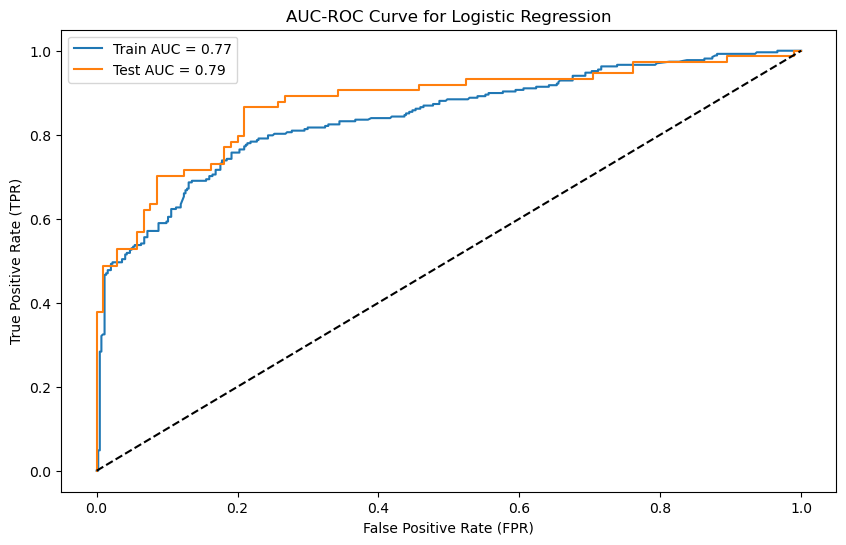

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, label=f'Train AUC = {auc_train_score:.2f}')
plt.plot(fpr_test, tpr_test, label=f'Test AUC = {auc_test_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.legend()
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('AUC-ROC Curve for Logistic Regression')
plt.show()

### Decision tree

AUC-ROC Score Training dataset: 0.80
AUC-ROC Score Test dataset: 0.78


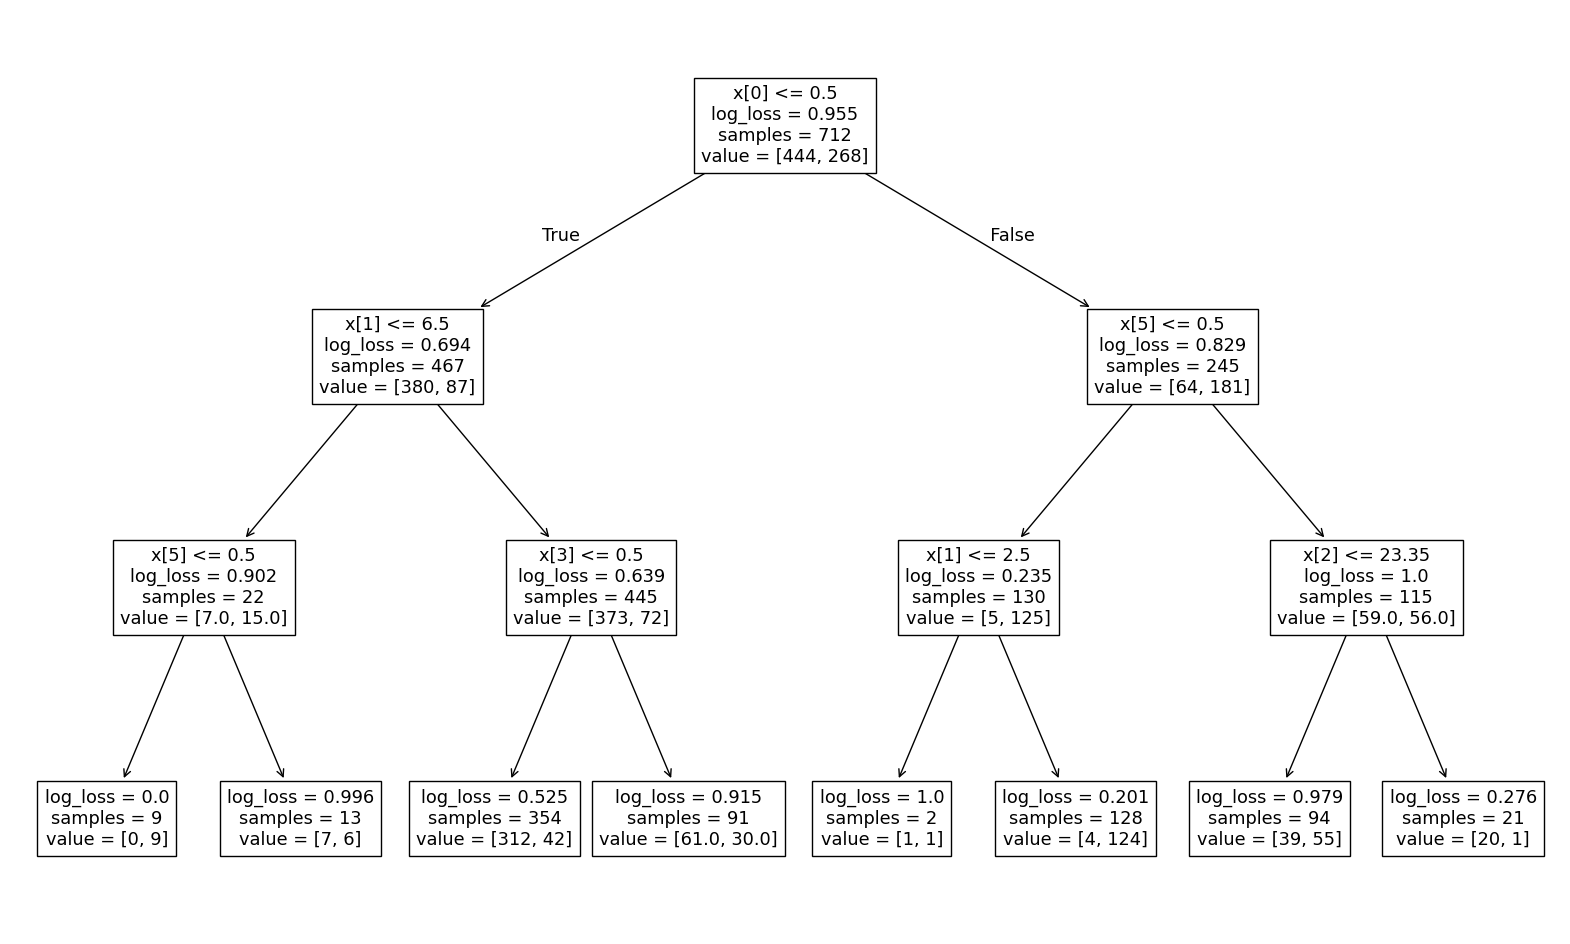

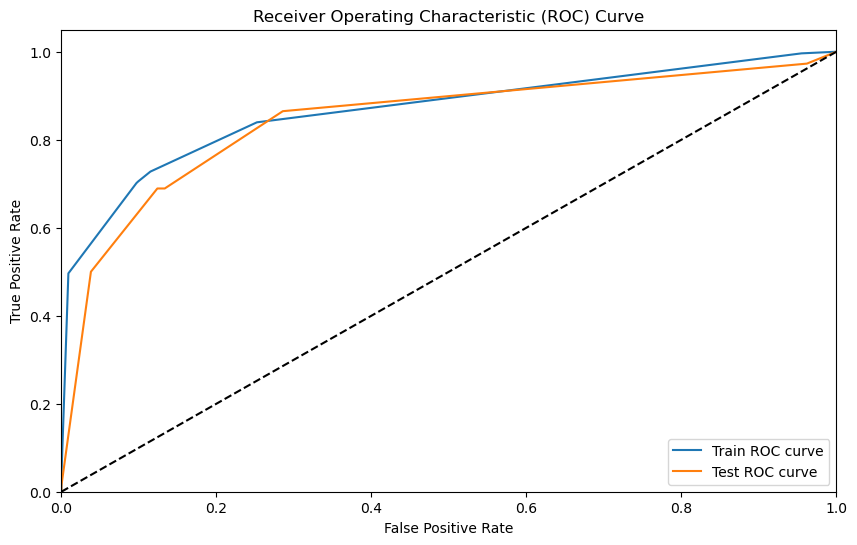

In [15]:
# Training the model - Decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3, criterion='log_loss')
dt.fit(X_train, y_train)

y_train_pred_dt = dt.predict(X_train)
y_test_pred_dt = dt.predict(X_test)

auc_train_score = roc_auc_score(y_train, y_train_pred_dt)
auc_test_score = roc_auc_score(y_test, y_test_pred_dt)
print(f"AUC-ROC Score Training dataset: {auc_train_score:.2f}")
print(f"AUC-ROC Score Test dataset: {auc_test_score:.2f}")

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(20,12))
plot_tree(dt)
plt.show()


# Calculate the ROC curve
fpr_train_dt, tpr_train_dt, _ = roc_curve(y_train, dt.predict_proba(X_train)[:, 1])
fpr_test_dt, tpr_test_dt, _ = roc_curve(y_test, dt.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_train_dt, tpr_train_dt, label='Train ROC curve')
plt.plot(fpr_test_dt, tpr_test_dt, label='Test ROC curve')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Random Forrest


AUC-ROC Score Training dataset: 0.94
AUC-ROC Score Test dataset: 0.78


<Figure size 2000x1200 with 0 Axes>

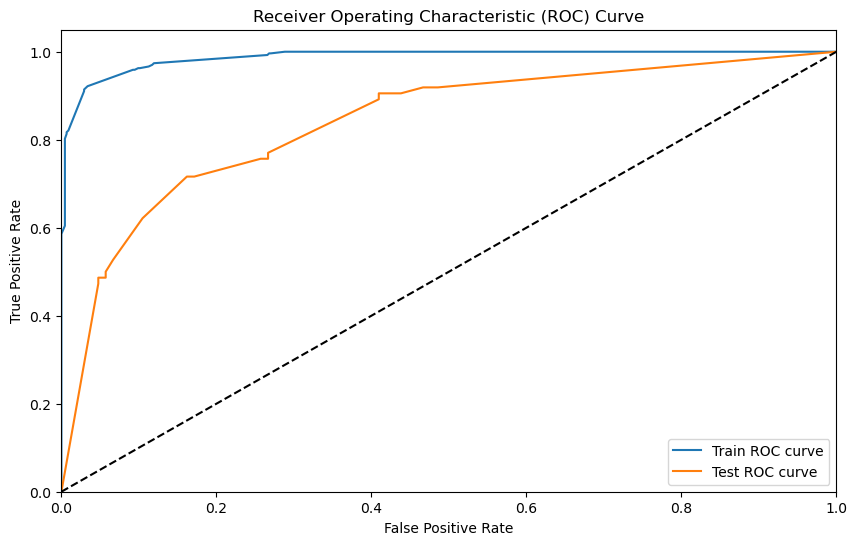

In [16]:
# Training the model - Decision tree
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=5, random_state=42)
rf.fit(X_train, y_train)

y_train_pred_dt = rf.predict(X_train)
y_test_pred_dt = rf.predict(X_test)

auc_train_score = roc_auc_score(y_train, y_train_pred_dt)
auc_test_score = roc_auc_score(y_test, y_test_pred_dt)
print(f"AUC-ROC Score Training dataset: {auc_train_score:.2f}")
print(f"AUC-ROC Score Test dataset: {auc_test_score:.2f}")

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(20,12))
plt.show()


# Calculate the ROC curve
fpr_train_rf, tpr_train_rf, _ = roc_curve(y_train, rf.predict_proba(X_train)[:, 1])
fpr_test_rf, tpr_test_rf, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_train_rf, tpr_train_rf, label='Train ROC curve')
plt.plot(fpr_test_rf, tpr_test_rf, label='Test ROC curve')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

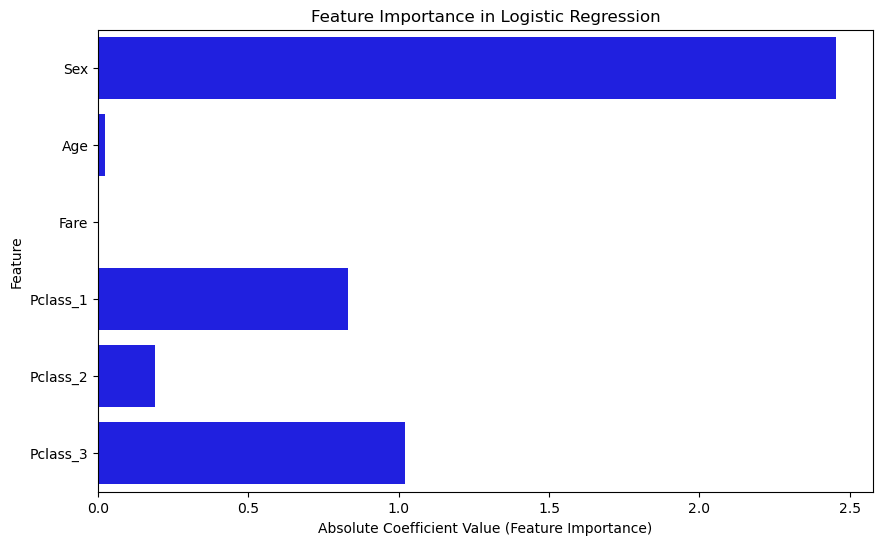

In [17]:
features = X_train.columns

# Get the coefficients of the logistic regression model
coefficients = clf.coef_[0]

# Take absolute values of coefficients for better comparison
importance = np.abs(coefficients)

# Plot the coefficients (feature importance)
plt.figure(figsize=(10, 6))
sns.barplot(x=importance, y=features, color='blue')
plt.xlabel('Absolute Coefficient Value (Feature Importance)')
plt.ylabel('Feature')
plt.title('Feature Importance in Logistic Regression')
plt.show()

## Conclusion
Looking at the results and the corresponding plots, we can conclude that a passenger's gender had the greatest impact on their survival chances. It has become very clear that a female passenger had a significantly higher chance of survival than a male passenger. Furthermore, we expect that a passenger's class also had a clear influence on their survival chances. 
In addition to the accurate predictions, it has also become clear that the correlation between survival and age is significantly lower than we had anticipated. Furthermore, it can be concluded that fare had almost no direct influence on survival chances, though this could be linked to the ticket classes, as prices tend to increase with class.

### Logistic regression
The logistic regression model performed well in predicting Titanic survivability, achieving an accuracy score of 0.81 on the training set and 0.79 on the test set. This slight decrease in test set performance indicates that the model generalizes well, avoiding significant overfitting.

### Decision tree
Changing parameters did have some effect. Using **random** makes the algorithm perform worse. After some testing, it seems like **max_depth=3** is the optimal depth for this algorithm to gain an accuracy score of 0.79.

In [18]:
# Predict using the model
kaggle_competition_predictions = rf.predict(kaggleX)

# Create the output DataFrame
output = pd.DataFrame({
    'PassengerId': test_df['PassengerId'], 
    'Survived': kaggle_competition_predictions
})

# Save the DataFrame to a CSV file
output.to_csv('prediction.csv', index=False)

# Print a success message
print("Your submission was successfully saved!")

Your submission was successfully saved!
